# Predicting Election into the National Baseball Hall of Fame

## Project Goal

The goal of this project is to find out whether a model built exclusively on traditional statistics can do a better job of predicting Hall of Fame induction by the Baseball Writers' Association of America (BBWAA) than one built solely using the more advanced statistics we use to measure player value today.

## Introduction to the Hall of Fame and Baseball Stats

In 1936, Major League Baseball established its National Baseball Hall of Fame in Cooperstown, NY, and since that point, a group of 400+ long-tenured baseball writers (the BBWAA) has been the primary hurdle between the most talented major league players and baseball immortality.  The writers have voted annually since 1966 (and most of the years before that), and the rules of who appears on the ballot, who is allowed to remain, and how many players the writers are permitted to vote for have evolved throughout the generations, as have the voting bodies, the players, and indeed the game of baseball itself.  The threshold for election is 75%, and to get such a large group of people of varying expertise, preferences, and interest in the sport to independently agree to induct a player into what many are convinced is and should be the most exclusive shrine out there is no easy task.

There is one objective set of measures that the voters can look to, one more reliable than intangible qualities like "fame" or "heart": statistics, a phenomenon nearly synonymous with baseball for as long as there have been newspapers to report them.  However, those have evolved quite dramatically as well.  For example, once upon a time we could point to one pitcher with a higher "win" total than another pitcher, and say that first pitcher was better.  However, with the advent of data analytics, it has become quite clear that said statistic is largely influenced by the offensive production of the pitcher's team, and a pitcher's value can be much more accurately estimated by his ability to prevent the other team from scoring runs (a quality that can be quantified and then scaled against the league average-- ERA+).

The emergence of these new statistics has created something of a chasm among the baseball writers who vote for the Hall of Fame each year-- some have bought into the sabermetric movement, while others have clung tight to the traditional statistics, as well as the eye test ("I covered him as a player, and I never believed I was watching a Hall of Famer").  This conflict has spawned plenty of grassroots movements on both sides of the aisle from writers and fans alike, and as we speak, those conversations are in full force, as the Hall of Fame Class of 2019 will be announced on January 22nd, less than two weeks from the presentation of this project.  

One day, I hope to have some say on who gets elected into the Baseball Hall of Fame.  And if that day ever comes, I will have plenty to say.  But for now, I'll settle for analyzing the voting patterns of the BBWAA, which is what I set out to do here.

## Problem Summary and Plan of Action

__Problem Summary__

As stated at the top, my goal here was to determine whether a model built purely on traditional baseball statistics could do a better job of predicting Hall of Fame election by the BBWAA than a similar one built while only using advanced statistics.  (The distinction of being voted in by the BBWAA is a necessary one-- there are other avenues of Hall of Fame induction, such as 16-person "Veterans Committees" made up of former players and executives that meet once every few years to discuss candidates in a panel before voting on them, and players inducted by those avenues are not considered in this project.)  My hypothesis was that such a model could be built, especially given the fact that the writers did not have access to those advanced statistics until recently, and the models would be built on historical voting data.  That being said, that outcome was far from a certainty, because of the powerful nature of the advanced statistics I planned to use.

The specific advanced statistics I used to measure against the traditional ones include WAR (Wins Above Replacement, an aggregate statistic meant to determine the number of wins a certain player is worth above a replacement-level player), WAR7 (their WAR from the best 7 seasons of their career-- essentially a measure of their "peak value"), and JAWS (the average of the two aforementioned statistics, developed by baseball statistician and genius Jay Jaffe).  This is significant because these statistics have just about every traditional statistic of value baked into them, and so they not only do a great job of retrospectively (and currently) determining value, but are highly correlated with actual Hall of Fame membership.  These three statistics, along with a fourth (the aforementioned ERA+ for pitchers, and OPS+ for hitters, a similar statistic that adds a hitter's On-Base Percentage and Slugging Percentages together, then scales that number against the league average), would make up the features of the advanced statistical models I tested against.

__Plan of Action__

In order to perform this analysis, my overall plan would be to build the best possible models (one for hitters and one for pitchers, since the statistics are different) for predicting Hall of Fame election by the BBWAA while exclusively using traditional statistics (limiting the amount of features to be considered at once to 4, to match the number of advanced features at our disposal), and to then measure their accuracy against the best possible models built from the 4 aforementioned advanced statistics.  Once it was determined whether these traditional models or the advanced models were more accurate, I would then use the best ones to attempt to predict which players on the 2019 ballot (and players with at least 10 years of Major League service, active or recently retired but yet to appear on a Hall of Fame ballot) would eventually be elected by the writers.

__To be clear:__ My goal here was not to use the results of the comparative accuracy analysis to make a claim that traditional statistics are a better predictor of being voted into the Hall of Fame than advanced ones (or vice versa), nor was it to build the best possible predictive model of Hall of Fame induction (such a model would likely need to rely on both traditional and advanced statistics), but merely to see if I could build a predictive model with only traditional statistics at my disposal that performed better than a model built on these specific advanced ones.

# Data Retrieval/Preliminary Cleaning

__Data Retrieval__

The two primary datasets I needed to create (one for hitters, one for pitchers) would need to contain the statistics of every MLB player who has appeared on a BBWAA Hall of Fame ballot since 1966.  As was mentioned in the introduction, the rules of Hall of Fame voting have evolved quite a bit over the years (the most recent major change, decreasing the number of years a player could spend on the ballot without being elected from 15 to 10, happened in 2014), but 1966 was the most logical cutpoint because it was the year that elections began to be held annually, it was around the time when the number of players appearing on the ballot began to be limited to roughly 40-50 players (so writers didn't have to sift through 120-player ballots anymore), and the rule had just been instituted that a player could no longer appear on the ballot more than 20 years after their retirement, meaning the writers were more likely to have actually seen them play.

The original list of players was downloaded from Sean Lahman's Baseball Database (https://data.world/dave/lahman-sabremetrics-dataset/), a free, relational database of baseball statistics dating back to 1871 (this link only provides information up to 2016, so I had to impute the last two years of Hall of Fame data on my own).  The statistics corresponding to those names were then downloaded from various statistical pages from Baseball-Reference.com's database (example here:  https://www.baseball-reference.com/leaders/jaws_1B.shtml) and attached to the corresponding players (these entire pages needed to be downloaded to do so-- most of the players on the Baseball-Reference pages were not part of the final datasets).  It was also necessary to retrieve the names of all the players who were inducted into the Hall of Fame by the BBWAA in that time (as opposed to all Hall of Fame inductees), found here: https://www.baseball-reference.com/bullpen/Hall_of_Fame_Voting_Percentages.

__Preliminary Cleaning in Excel__

Once the data had been pulled into Excel, the following reorganization and cleaning steps were taken:

1. I created six tables-- two for hitters/pitchers who have appeared on a ballot since 1966 (excluding those currently on the 2019 ballot), two for hitters/pitchers on the 2019 ballot, and two for hitters/pitchers eligible for consideration in the future (i.e. anyone who has played 10 years or more who is either active, retired in the last 5 years and has not yet appeared on the ballot, or is currently on the ballot).
2. In doing the necessary VLOOKUPS to link the Baseball-Reference statistics to the proper players, I discovered many name duplicates (mostly fathers and sons, e.g. Ken Griffey Sr. and Ken Griffey Jr. both being listed as Ken Griffey), so I needed to change several names so a player wasn't linked to inaccurate statistics.
3. I determined that relief pitchers needed to be excluded from the pitcher analysis, as their low innings totals would skew the data significantly and make it very difficult to determine the best possible models for pitchers.

## Data Dictionary

__Hitter Statistics__

WAR (Wins Above Replacement)- aggregate statistic that uses a number of factors to determine the number of wins a certain player is worth above a replacement-level player.  Full explanation for hitters here: https://www.baseball-reference.com/about/war_explained_position.shtml

WAR7- WAR from the 7 best years of a player's career ("peak value")

JAWS- Average of WAR and WAR7

ASG- All-Star Games

AB- At-Bats

R- Runs

H- Hits

HR- Homeruns

RBI- Runs Batted In

BB- Walks

BA- Batting Average (Hits per AB)

OBP- On-Base Percentage (% of Plate Apperances that a player reaches base safely)

SLG- Slugging Percentage (Total Bases per AB)

OPS- OBP + SLG

OPS+- Adjusted OPS (accounting for external factors such as ballparks played in) so that 100 is the league average (so 150 would be 50% better than the league average)

__Pitcher Statistics__

WAR (Wins Above Replacement)- aggregate statistic that uses a number of factors to determine the number of wins a certain player is worth above a replacement-level player.  Full explanation for pitchers here:  https://www.baseball-reference.com/about/war_explained_pitch.shtml

(WAR7, JAWS, ASG explained above)

W- Wins

L- Losses

W-L%- Winning Percentage

ERA- Earned Run Average per 9 Innings

ERA+- Adjusted ERA (accounting for external factors such as ballparks played in) so that 100 is the league average (so 150 would be 50% better than the league average)

CG- Complete Games

SHO- Shutouts

IP- Innings Pitched

H- Hits Allowed

ER- Earned Runs Allowed

HR- Homeruns Allowed

BB- Walks Allowed

SO- Strikeouts

## Exploratory Data Analysis

The following two datasets consist of every MLB player (excluding relief pitchers) who has appeared on a BBWAA Hall of Fame ballot since 1966.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=14

In [2]:
hit=pd.read_csv('Ind_CSVs/HitterSet.csv')

In [3]:
pitch=pd.read_csv('Ind_CSVs/PitcherSet.csv')

In [4]:
hit.head()

,Name,HoF,WAR,WAR7,JAWS,Yrs,From,To,ASG,G,...,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+
0,Ivan Rodriguez,1,68.7,39.8,54.3,21,1991,2011,14,2543,...,1332,127,64,513,1474,0.296,0.334,0.464,0.798,106
1,Jorge Posada,0,42.8,32.7,37.7,17,1995,2011,5,1829,...,1065,20,21,936,1453,0.273,0.374,0.474,0.848,121
2,Jason Varitek,0,24.2,18.8,21.5,15,1997,2011,3,1546,...,757,25,18,614,1216,0.256,0.341,0.435,0.776,99
3,Jason Kendall,0,41.7,30.4,36.0,15,1996,2010,3,2085,...,744,189,89,721,686,0.288,0.366,0.378,0.744,95
4,Brad Ausmus,0,16.5,15.1,15.8,18,1993,2010,1,1971,...,607,102,53,634,1034,0.251,0.325,0.344,0.669,75


In [5]:
pitch.head()

,Name,HoF,WAR,WAR7,JAWS,Yrs,From,To,ASG,W,...,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF
0,Johan Santana,0,51.6,45.0,48.3,12,2000,2012,4,139,...,773,721,220,567,13.0,1988,36,12,68,8262
1,Jamie Moyer,0,49.9,32.9,41.4,25,1986,2012,1,269,...,2076,1926,522,1155,69.0,2441,146,12,57,17356
2,Carlos Zambrano,0,44.0,38.4,41.2,12,2001,2012,3,132,...,879,797,161,898,41.0,1637,102,5,58,8389
3,Chris Carpenter,0,34.1,29.4,31.8,15,1997,2012,3,144,...,1021,927,220,627,23.0,1697,85,3,51,9305
4,Livan Hernandez,0,30.2,27.5,28.9,17,1996,2012,2,178,...,1686,1572,362,1066,86.0,1976,78,13,41,13816


__Key note:__  I have already coded the HoF column into 0s and 1s on Excel, but a "0" indicates that the player was not voted in by the BBWAA, not necessarily that they did not make the Hall of Fame (as mentioned above, there are Hall of Famers on this list who were admitted via other avenues, and they are not considered as Hall of Famers for the sake of this project, since the goal is to build a model that predicts how the writers will vote).

In [6]:
hit=hit.set_index('Name')
hit.head()

,HoF,WAR,WAR7,JAWS,Yrs,From,To,ASG,G,PA,...,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+
Name,,,,,,,,,,,,,,,,,,,,,
Ivan Rodriguez,1,68.7,39.8,54.3,21,1991,2011,14,2543,10270,...,1332,127,64,513,1474,0.296,0.334,0.464,0.798,106
Jorge Posada,0,42.8,32.7,37.7,17,1995,2011,5,1829,7150,...,1065,20,21,936,1453,0.273,0.374,0.474,0.848,121
Jason Varitek,0,24.2,18.8,21.5,15,1997,2011,3,1546,5839,...,757,25,18,614,1216,0.256,0.341,0.435,0.776,99
Jason Kendall,0,41.7,30.4,36.0,15,1996,2010,3,2085,8702,...,744,189,89,721,686,0.288,0.366,0.378,0.744,95
Brad Ausmus,0,16.5,15.1,15.8,18,1993,2010,1,1971,7102,...,607,102,53,634,1034,0.251,0.325,0.344,0.669,75


In [7]:
pitch=pitch.set_index('Name')
pitch.head()

,HoF,WAR,WAR7,JAWS,Yrs,From,To,ASG,W,L,...,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF
Name,,,,,,,,,,,,,,,,,,,,,
Johan Santana,0,51.6,45.0,48.3,12,2000,2012,4,139,78,...,773,721,220,567,13.0,1988,36,12,68,8262
Jamie Moyer,0,49.9,32.9,41.4,25,1986,2012,1,269,209,...,2076,1926,522,1155,69.0,2441,146,12,57,17356
Carlos Zambrano,0,44.0,38.4,41.2,12,2001,2012,3,132,91,...,879,797,161,898,41.0,1637,102,5,58,8389
Chris Carpenter,0,34.1,29.4,31.8,15,1997,2012,3,144,94,...,1021,927,220,627,23.0,1697,85,3,51,9305
Livan Hernandez,0,30.2,27.5,28.9,17,1996,2012,2,178,177,...,1686,1572,362,1066,86.0,1976,78,13,41,13816


In [8]:
hit.shape

(496, 26)

In [9]:
pitch.shape

(198, 31)

In [10]:
hit.dtypes

HoF       int64
WAR     float64
WAR7    float64
JAWS    float64
Yrs       int64
From      int64
To        int64
ASG       int64
G         int64
PA        int64
AB        int64
R         int64
H         int64
2B        int64
3B        int64
HR        int64
RBI       int64
SB        int64
CS        int64
BB        int64
SO        int64
BA      float64
OBP     float64
SLG     float64
OPS     float64
OPS+      int64
dtype: object

In [11]:
hit=hit.drop(['From','To','G','PA','2B','3B','SB','CS','SO'], axis='columns')
hit.head()

,HoF,WAR,WAR7,JAWS,Yrs,ASG,AB,R,H,HR,RBI,BB,BA,OBP,SLG,OPS,OPS+
Name,,,,,,,,,,,,,,,,,
Ivan Rodriguez,1,68.7,39.8,54.3,21,14,9592,1354,2844,311,1332,513,0.296,0.334,0.464,0.798,106
Jorge Posada,0,42.8,32.7,37.7,17,5,6092,900,1664,275,1065,936,0.273,0.374,0.474,0.848,121
Jason Varitek,0,24.2,18.8,21.5,15,3,5099,664,1307,193,757,614,0.256,0.341,0.435,0.776,99
Jason Kendall,0,41.7,30.4,36.0,15,3,7627,1030,2195,75,744,721,0.288,0.366,0.378,0.744,95
Brad Ausmus,0,16.5,15.1,15.8,18,1,6279,718,1579,80,607,634,0.251,0.325,0.344,0.669,75


In [12]:
pitch.dtypes

HoF       int64
WAR     float64
WAR7    float64
JAWS    float64
Yrs       int64
From      int64
To        int64
ASG       int64
W         int64
L         int64
W-L%    float64
ERA     float64
ERA+      int64
G         int64
GS        int64
GF        int64
CG        int64
SHO       int64
SV        int64
IP      float64
H         int64
R         int64
ER        int64
HR        int64
BB        int64
IBB     float64
SO        int64
HBP       int64
BK        int64
WP        int64
BF        int64
dtype: object

In [13]:
pitch=pitch.drop(['From','To','G','GS','GF','SV','R','IBB','HBP','BK','WP','BF'], axis='columns')
pitch.head()

,HoF,WAR,WAR7,JAWS,Yrs,ASG,W,L,W-L%,ERA,ERA+,CG,SHO,IP,H,ER,HR,BB,SO
Name,,,,,,,,,,,,,,,,,,,
Johan Santana,0,51.6,45.0,48.3,12,4,139,78,0.641,3.20,136,15,10,2025.2,1726,721,220,567,1988
Jamie Moyer,0,49.9,32.9,41.4,25,1,269,209,0.563,4.25,103,33,10,4074.0,4231,1926,522,1155,2441
Carlos Zambrano,0,44.0,38.4,41.2,12,3,132,91,0.592,3.66,120,10,5,1959.0,1709,797,161,898,1637
Chris Carpenter,0,34.1,29.4,31.8,15,3,144,94,0.605,3.76,116,33,15,2219.1,2205,927,220,627,1697
Livan Hernandez,0,30.2,27.5,28.9,17,2,178,177,0.501,4.44,95,50,9,3189.0,3525,1572,362,1066,1976


The above removes stats that are either irrelevant as far as this project is concerned or are redundant (e.g. games and innings pitched are both measures of a pitcher's longevity, so looking at both isn't necessary).

In [14]:
print(hit.shape)
print(pitch.shape)

(496, 17)
(198, 19)


In [15]:
hit.isnull().sum()

HoF     0
WAR     0
WAR7    0
JAWS    0
Yrs     0
ASG     0
AB      0
R       0
H       0
HR      0
RBI     0
BB      0
BA      0
OBP     0
SLG     0
OPS     0
OPS+    0
dtype: int64

In [16]:
pitch.isnull().sum()

HoF     0
WAR     0
WAR7    0
JAWS    0
Yrs     0
ASG     0
W       0
L       0
W-L%    0
ERA     0
ERA+    0
CG      0
SHO     0
IP      0
H       0
ER      0
HR      0
BB      0
SO      0
dtype: int64

In [17]:
hit.describe()

,HoF,WAR,WAR7,JAWS,Yrs,ASG,AB,R,H,HR,RBI,BB,BA,OBP,SLG,OPS,OPS+
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,0.116935,34.880847,26.411895,30.649597,15.506048,4.018145,6178.122984,878.385081,1709.540323,193.735887,849.139113,661.798387,0.273123,0.343589,0.425587,0.769111,109.576613
std,0.321668,23.506133,12.667195,17.916385,3.234280,4.272732,2100.496970,370.786218,640.261546,134.957834,389.119725,343.450647,0.020951,0.028865,0.059691,0.081460,19.831262
min,0.000000,-2.800000,0.100000,-0.800000,6.000000,0.000000,661.000000,54.000000,153.000000,6.000000,66.000000,44.000000,0.193000,0.252000,0.259000,0.529000,50.000000
25%,0.000000,18.875000,17.775000,18.450000,13.000000,1.000000,4894.750000,642.500000,1313.000000,85.750000,574.750000,435.250000,0.260000,0.325000,0.388000,0.720750,97.000000
50%,0.000000,30.400000,25.300000,27.650000,15.000000,3.000000,6129.500000,870.000000,1678.500000,172.500000,825.000000,608.000000,0.273000,0.343000,0.427000,0.775000,111.000000
75%,0.000000,45.425000,34.125000,40.150000,18.000000,6.000000,7403.500000,1092.500000,2099.500000,275.000000,1097.500000,849.250000,0.287000,0.362000,0.465000,0.821000,122.000000
max,1.000000,156.400000,73.700000,115.000000,25.000000,25.000000,14053.000000,2295.000000,4256.000000,755.000000,2297.000000,2190.000000,0.344000,0.482000,0.634000,1.116000,190.000000


11.7% of the hitters appearing on Hall of Fame ballots since 1966 were elected by the writers.

In [18]:
hit['HoF'].value_counts(normalize='True')

0    0.883065
1    0.116935
Name: HoF, dtype: float64

Average WAR (Wins Above Replacement) for Hall of Famers vs. non-Hall of Famers is depicted below-- obviously the difference is quite stark, as WAR is the best aggregate evaluator we have of the value a player adds.

In [19]:
print(hit.loc[hit.HoF==1, 'WAR'].mean())
print(hit.loc[hit.HoF==0, 'WAR'].mean())

77.7
29.210730593607302


We can see below (unsurprisingly) that every statistic is significantly better for Hall of Famers than non-Hall of Famers.  The same can be seen with the pitcher statistics as well.

In [20]:
hit.groupby('HoF').mean()

,WAR,WAR7,JAWS,Yrs,ASG,AB,R,H,HR,RBI,BB,BA,OBP,SLG,OPS,OPS+
HoF,,,,,,,,,,,,,,,,
0,29.210731,23.688584,26.452740,15.000000,2.986301,5794.285388,801.570776,1586.134703,170.175799,774.431507,600.029680,0.270753,0.340059,0.417856,0.757858,106.691781
1,77.700000,46.977586,62.343103,19.327586,11.810345,9076.758621,1458.465517,2641.465517,371.655172,1413.310345,1128.258621,0.291017,0.370241,0.483966,0.854086,131.362069


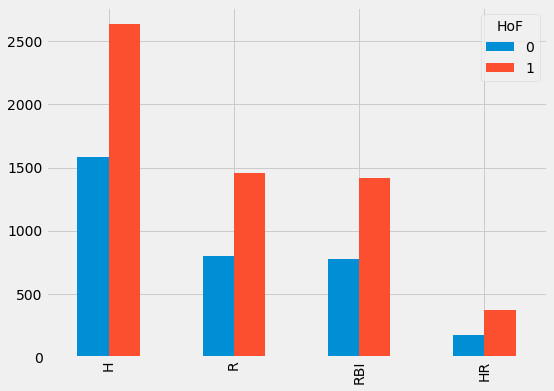

In [23]:
hit.groupby('HoF')['H','R','RBI','HR'].mean().T.plot(kind='bar')

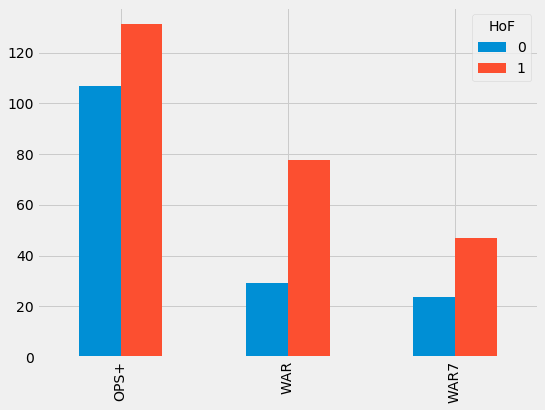

In [24]:
hit.groupby('HoF')['OPS+','WAR','WAR7'].mean().T.plot(kind='bar')

In [25]:
pitch.describe()

,HoF,WAR,WAR7,JAWS,Yrs,ASG,W,L,W-L%,ERA,ERA+,CG,SHO,IP,H,ER,HR,BB,SO
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.126263,38.325758,30.230808,34.276263,15.570707,2.939394,169.611111,137.949495,0.549990,3.574192,108.792929,101.707071,23.474747,2714.443434,2584.378788,1068.035354,232.974747,877.626263,1683.732323
std,0.332987,21.132257,11.133514,15.919273,3.791863,2.793459,59.825425,46.491389,0.047266,0.380084,10.102146,71.222359,13.443126,913.692383,849.694459,339.343355,89.701391,330.605830,766.986657
min,0.000000,2.000000,6.200000,4.100000,10.000000,0.000000,68.000000,62.000000,0.422000,2.280000,85.000000,4.000000,1.000000,1177.100000,1147.000000,461.000000,65.000000,292.000000,572.000000
25%,0.000000,22.000000,21.025000,21.625000,12.250000,1.000000,126.250000,105.250000,0.521750,3.300000,102.000000,54.250000,13.000000,2065.875000,1988.500000,814.500000,172.250000,627.250000,1137.250000
50%,0.000000,32.800000,28.850000,31.150000,15.000000,2.000000,151.500000,129.000000,0.546500,3.565000,107.000000,79.000000,20.500000,2492.100000,2437.500000,1010.000000,220.000000,816.000000,1556.500000
75%,0.000000,48.950000,37.300000,42.975000,18.000000,4.000000,206.250000,160.750000,0.577000,3.810000,114.750000,131.750000,31.000000,3195.075000,3063.250000,1245.250000,279.000000,1065.250000,1992.500000
max,1.000000,110.100000,61.500000,84.800000,27.000000,17.000000,363.000000,292.000000,0.690000,4.830000,154.000000,394.000000,63.000000,5404.000000,5044.000000,2012.000000,522.000000,2795.000000,5714.000000


12.6% of the starting pitchers appearing on Hall of Fame ballots since 1966 were elected by the writers.

In [26]:
pitch['HoF'].value_counts(normalize='True')

0    0.873737
1    0.126263
Name: HoF, dtype: float64

As above, we have the average WAR for Hall of Famers vs. non-Hall of Famers.

In [27]:
print(pitch.loc[pitch.HoF==1, 'WAR'].mean())
print(pitch.loc[pitch.HoF==0, 'WAR'].mean())

78.26400000000002
32.55433526011561


In [28]:
pitch.groupby('HoF').mean()

,WAR,WAR7,JAWS,Yrs,ASG,W,L,W-L%,ERA,ERA+,CG,SHO,IP,H,ER,HR,BB,SO
HoF,,,,,,,,,,,,,,,,,,
0,32.554335,27.636416,30.093064,14.953757,2.219653,154.17341,129.312139,0.544249,3.632081,107.046243,86.601156,20.265896,2493.104624,2411.208092,1004.531792,216.317919,815.982659,1493.843931
1,78.264000,48.184000,63.224000,19.840000,7.920000,276.44000,197.720000,0.589720,3.173600,120.880000,206.240000,45.680000,4246.108000,3782.720000,1507.480000,348.240000,1304.200000,2997.760000


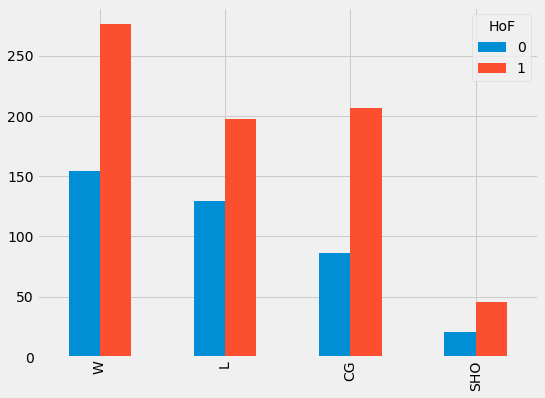

In [29]:
pitch.groupby('HoF')['W','L','CG','SHO'].mean().T.plot(kind='bar') #notice I included losses here, even though that's a negative stat, to illustrate that Hall of Fame pitchers played longer

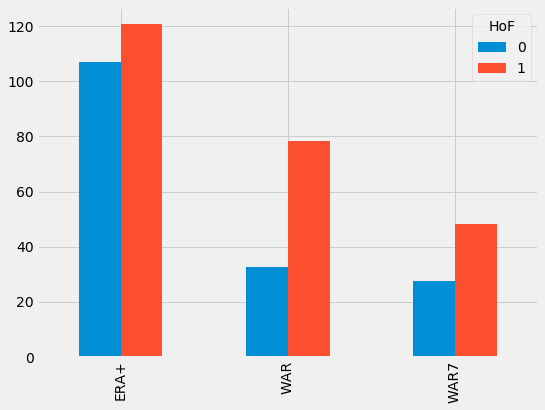

In [30]:
pitch.groupby('HoF')['ERA+','WAR','WAR7'].mean().T.plot(kind='bar')

Below, we have correlations of different statistics with each other, and more specifically with Hall of Fame outcomes.

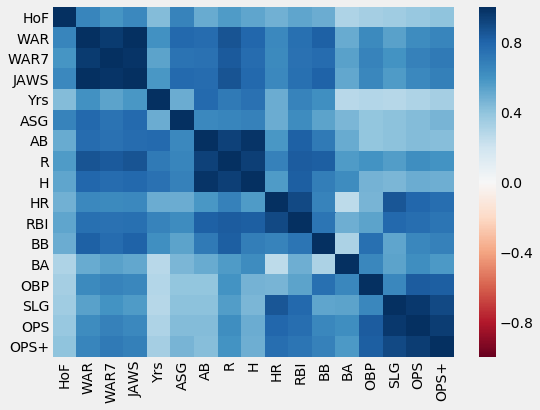

In [31]:
sns.heatmap(hit.corr(), vmin=-1, vmax=1, cmap='RdBu')

In [32]:
hit.corr().loc['HoF'].sort_values(ascending=False)

HoF     1.000000
ASG     0.664308
WAR     0.663548
JAWS    0.644370
WAR7    0.591396
R       0.569875
H       0.530199
RBI     0.528132
AB      0.502674
BB      0.494727
HR      0.480220
Yrs     0.430403
OPS+    0.400158
OPS     0.379983
SLG     0.356254
OBP     0.336340
BA      0.311113
Name: HoF, dtype: float64

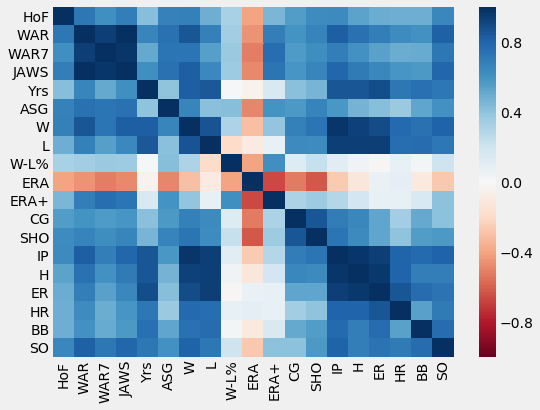

In [33]:
sns.heatmap(pitch.corr(), vmin=-1, vmax=1, cmap='RdBu')

In [34]:
pitch.corr().loc['HoF'].sort_values(ascending=False)

HoF     1.000000
WAR     0.720260
JAWS    0.693007
W       0.680533
ASG     0.679495
SO      0.652925
IP      0.638866
SHO     0.629509
WAR7    0.614548
CG      0.559349
H       0.537482
ER      0.493527
BB      0.491734
L       0.489960
HR      0.489718
ERA+    0.455988
Yrs     0.429091
W-L%    0.320342
ERA    -0.401669
Name: HoF, dtype: float64

Of particular note here, besides how highly correlated every statistic is with being in the Hall of Fame (even the negative ones for pitchers, since Hall of Famers are generally around long enough to accumulate more statistics in general) is that WAR and JAWS appear to be most highly correlated with being voted into the Hall of Fame for both hitters and pitchers, but also that All-Star appearances seem to be extremely important, interesting since unlike all the other statistics, that one is also the result of a vote (and essentially a popularity contest).

# Model Selection

The first step of my analysis was to select the model types I would use to predict who the writers would vote into the Hall of Fame.  This is clearly a classification problem, so I chose from four classifier model types:  Logisitic Regression, K-Nearest Neighbors, Decision Trees, and Random Forest.  Since in some way I would be using every statistic (both the traditional and advanced ones) as features, I fed all of them into each of the four classifiers to see which had the highest accuracy.

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
feature_cols=feature_cols=hit.columns.drop(['HoF'])
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [37]:
classifiers = []

model1= LogisticRegression()
classifiers.append(model1)

model2= KNeighborsClassifier()
classifiers.append(model2)

model3= DecisionTreeClassifier()
classifiers.append(model3)

model4= RandomForestClassifier()
classifiers.append(model4)

In [38]:
accuracy=[]

for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print("%s: Accuracy is %s" %(clf,acc))
    cm= confusion_matrix(y_test,y_pred)
    print("%s:  Confusion Matrix is %s" %(clf,cm))
    accuracy.append(acc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False): Accuracy is 0.9516129032258065
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):  Confusion Matrix is [[107   2]
 [  4  11]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'): Accuracy is 0.9274193548387096
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):  Confusion Matrix is [[107   2]


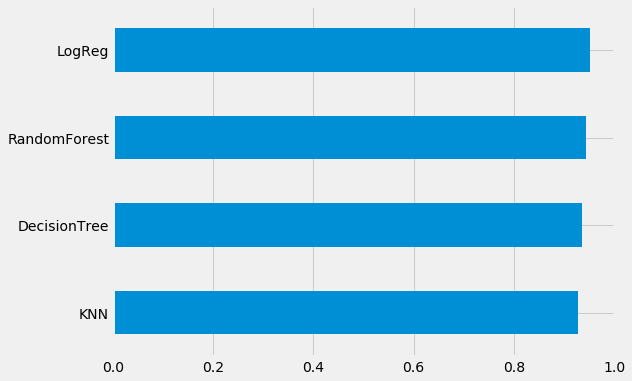

In [39]:
data = pd.DataFrame(accuracy, columns=['Accuracy'], index=['LogReg','KNN','DecisionTree','RandomForest'])
data.sort_values(by='Accuracy').plot(kind='barh', legend=False)

For the __hitter__ dataset, the results indicated that an untuned Logistic Regression model performed with the highest accuracy (95.2%) given all the features, and that a Random Forest finished a close second at 94.4%.  While I had initially thought to just try one model, I decided I would test both of these, since a Random Forest model provides more opportunities for tuning than a simple Logistic Regression model, and I might be able to make that one better (this would turn out to be correct).  I then performed the same process on the pitchers.

In [40]:
feature_cols=feature_cols=pitch.columns.drop(['HoF'])
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [41]:
classifiers = []

model1= LogisticRegression()
classifiers.append(model1)

model2= KNeighborsClassifier()
classifiers.append(model2)

model3= DecisionTreeClassifier()
classifiers.append(model3)

model4= RandomForestClassifier()
classifiers.append(model4)

In [42]:
accuracy=[]

for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print("%s: Accuracy is %s" %(clf,acc))
    cm= confusion_matrix(y_test,y_pred)
    print("%s:  Confusion Matrix is %s" %(clf,cm))
    accuracy.append(acc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False): Accuracy is 1.0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):  Confusion Matrix is [[44  0]
 [ 0  6]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'): Accuracy is 0.96
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):  Confusion Matrix is [[44  0]
 [ 2  4]]
DecisionTreeClassifier(cl

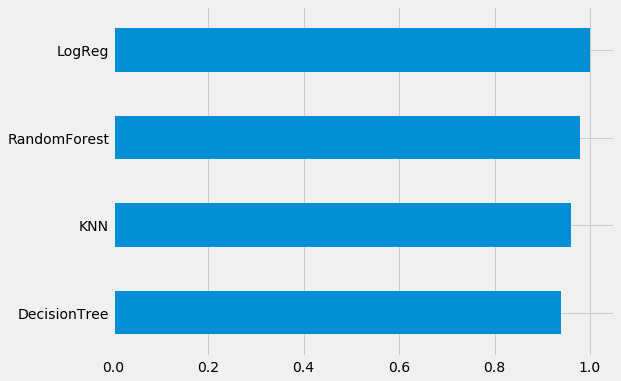

In [43]:
data = pd.DataFrame(accuracy, columns=['Accuracy'], index=['LogReg','KNN','DecisionTree','RandomForest'])
data.sort_values(by='Accuracy').plot(kind='barh', legend=False)

For the __pitcher__ dataset, an untuned Logistic Regression model performed perfectly, while the Random Forest model had just one false negative.  For the same reasons above, I decided I would look at those two model types.  

Once again, it is important to note here that these stellar accuracy results are due to the fact that I'm using all of the traditional and advanced statistics at my disposal, which is not what I plan to do for the rest of this project, as building the best possible model out of all the statistics is not my stated goal.

__Next Step__

Having decided upon Random Forest and Logistic Regression models, the next thing to do was to build and tune those models around exclusively traditional statistics, and see how they performed.

# Building A Traditional Hitting Model

__Option 1: Random Forest__

In [45]:
feature_cols=hit.columns.drop(['HoF','WAR','JAWS','WAR7','OPS+'])
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [46]:
rftradhit=RandomForestClassifier(random_state=1,max_features=4,oob_score=True)

__Note:__  My Random Forest model takes every hitting feature outside of the advanced statistics (WAR, WAR7, JAWS, OPS+), but max_features is set to 4, so that no tree is allowed to try more features than will be available in our advanced models.

In [47]:
rftradhit.fit(X_train,y_train)

/Users/leemac113/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/leemac113/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

__OOB score note:__  I continuously received the above error message as I tried to find OOB scores in this project because there need to be more estimators in order for them to be reliable.  However, the best cross-validation scores arose from lower "n_estimators" parameters, which created something of a conflict.  My decision was to use GridSearch cross-validation as my measure of reliability rather than OOB score.

In [48]:
rftradhit=RandomForestClassifier(random_state=1,max_features=4)
rftradhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
y_pred=rftradhit.predict(X_test)
accuracy_score(y_test,y_pred)

0.9435483870967742

In [50]:
y_test.value_counts(normalize=True) 

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Our relatively untuned Random Forest hitting model is performing __6.4% better__ than the null baseline.  Next, we tune it using __cross-validated grid search__.

In [51]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(rftradhit,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9433824509440948
6 0.9380783102358988
7 0.948836977138864
8 0.9381287580943571
9 0.9406213704994193
10 0.9381816026552869
11 0.9486965240641713
12 0.940630600358423


Our GridSearch will use __cv=7__, and will look to find the best parameters for __max_depth__ and __n_estimators__.

In [192]:
from sklearn.model_selection import GridSearchCV

In [194]:
rftradhit=RandomForestClassifier(random_state=1,max_features=4)

parameters = {
    'max_depth': range(1,13),
    'n_estimators': range(1,101)
}

clf=GridSearchCV(rftradhit, parameters, cv=7, scoring='accuracy',verbose=1)

In [195]:
clf.fit(X_train,y_train)

Fitting 7 folds for each of 1200 candidates, totalling 8400 fits


[Parallel(n_jobs=1)]: Done 8400 out of 8400 | elapsed: 10.8min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 13), 'n_estimators': range(1, 101)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [196]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 6, 'n_estimators': 9}
0.956989247311828


In [52]:
rftradhit=RandomForestClassifier(n_estimators=9, max_depth=6,max_features=4, random_state=1)
rftradhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [54]:
feat_imp= pd.DataFrame({'feature': feature_cols, 'importance':rftradhit.feature_importances_}).sort_values(by='importance', ascending=False)
feat_imp

,feature,importance
4,H,0.216749
3,R,0.161170
1,ASG,0.154922
6,RBI,0.109143
2,AB,0.078584
7,BB,0.061365
5,HR,0.053569
10,SLG,0.050172
11,OPS,0.039289
9,OBP,0.029746


In [56]:
feat_imp.head(4)

,feature,importance
4,H,0.216749
3,R,0.161170
1,ASG,0.154922
6,RBI,0.109143


Our best parameters are __9 estimators__ and a __max_depth of 6__, our best cross-validated score is __95.7%__, and our 4 most important traditional features are __hits, runs, All-Star Games, and RBIs__.

In [57]:
y_pred=rftradhit.predict(X_test)
rftradhit.score(X_test,y_test)

0.9596774193548387

In [58]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

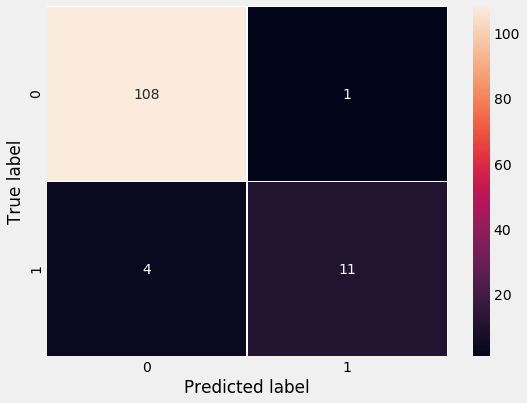

In [59]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

After tuning our Random Forest model, our accuracy score on the test data has climbed to about __96% (8% better than our null baseline)__, and our model is predicting __11/15 hitters who were voted into the Hall of Fame, and only one false positive.__

In [60]:
X_test['HoF_prob']=rftradhit.predict_proba(X_test)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
HoF_test=pd.concat([hit['HoF'],X_test['HoF_prob']],axis=1, join='inner')

In [62]:
HoF_test.sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Mike Schmidt,1,1.000000
Rod Carew,1,1.000000
Eddie Mathews,1,0.909722
Cal Ripken,1,0.888889
Al Kaline,1,0.888889
Vladimir Guerrero,1,0.827160
Mickey Mantle,1,0.777778
Willie Stargell,1,0.666667
Rafael Palmeiro,0,0.666667


Deeper analysis shows that __the one false positive was Rafael Palmeiro__, a player who easily has the counting statistics to be voted into the Hall of Fame, but was kept out due to an external factor that this model cannot account for:  testing positive for steroids.

In [63]:
HoF_test.loc[HoF_test.HoF==1,:].sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Rod Carew,1,1.000000
Mike Schmidt,1,1.000000
Eddie Mathews,1,0.909722
Cal Ripken,1,0.888889
Al Kaline,1,0.888889
Vladimir Guerrero,1,0.827160
Mickey Mantle,1,0.777778
Willie Stargell,1,0.666667
Mike Piazza,1,0.576389


__Option 2:  Logistic Regression__

In [64]:
feature_cols=['ASG','R','H','RBI']
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

__Note:__ Here I wanted to use the best 4 features I could, and I chose All-Star Games, Runs, Hits, and RBIs, as they were both the top 4 correlated with the HoF in our correlation matrix (outside of the advanced statistics), and the top 4 most important features in the above Random Forest.

In [65]:
lrtradhit=LogisticRegression(random_state=1)

In [66]:
lrtradhit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred=lrtradhit.predict(X_test)
accuracy_score(y_test,y_pred)

0.9435483870967742

In [68]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

As with our untuned Random Forest hitting model, our untuned Logistic Regression model performs __6.4% better__ than the null baseline.  Again, we tune using __cross-validated grid search__.

In [69]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(lrtradhit,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9327878563495002
6 0.9274976986505279
7 0.9329140461215932
8 0.9248284767190873
9 0.9300393599174088
10 0.9302908171329225
11 0.9274732620320857
12 0.932829301075269


Our GridSearch will use __cv=7__, and will look to find the best parameters for __C__.

In [235]:
lrtradhit=LogisticRegression(random_state=1)

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

clf=GridSearchCV(lrtradhit, parameters, cv=7, scoring='accuracy',verbose=1)

In [236]:
clf.fit(X_train,y_train)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.2s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [237]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 100}
0.9516129032258065


Our preferred __C__ value is __100__, and our best possible cross-validation score is __95.2%__.

In [70]:
lrtradhit=LogisticRegression(random_state=1, C=100)
lrtradhit.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
y_pred=lrtradhit.predict(X_test)
lrtradhit.score(X_test,y_test)

0.9274193548387096

In [72]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

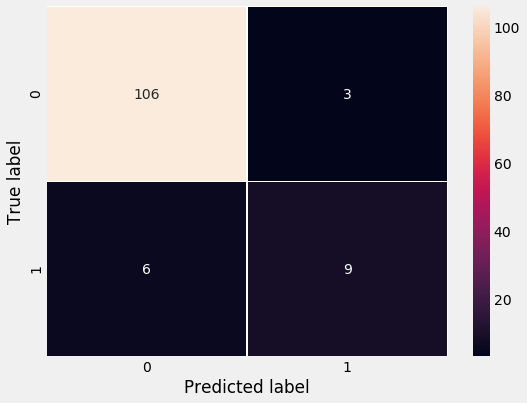

In [73]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

Our accuracy score on the test data actually went down to __92.7%__ here, and while cross-validation does show this is a better model than with C=1, our Random Forest model did better in both its cross-validation best score __(95.7%)__ and testing accuracy __(96%).__ 

__Therefore, we will use the Random Forest hitting model built from traditional statistics to test against a similar model built from the advanced ones.__

Now, we perform the exact same process as above to build our traditional pitching model.

# Building A Traditional Pitching Model

__Option 1:  Random Forest__

In [74]:
feature_cols=pitch.columns.drop(['HoF','WAR','JAWS','WAR7','ERA+'])
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [75]:
rftradpitch=RandomForestClassifier(random_state=1,max_features=4)

In [76]:
rftradpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [77]:
y_pred=rftradpitch.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [78]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Our pitching model is already performing perfectly on the test data (__12% better than the baseline__), but that is likely just luck, so we will still tune the parameters.

In [79]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(rftradpitch,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9390476190476191
6 0.9460470085470086
7 0.9321892393320966
8 0.9392543859649123
9 0.9525689905591866
10 0.9256410256410257
11 0.9437229437229437
12 0.9527972027972026


Our grid search will use __cv=12__.

In [257]:
rftradpitch=RandomForestClassifier(random_state=1,max_features=4)

parameters = {
    'max_depth': range(1,13),
    'n_estimators': range(1,101)
}

clf=GridSearchCV(rftradpitch, parameters, cv=12, scoring='accuracy',verbose=1)

In [258]:
clf.fit(X_train,y_train)

Fitting 12 folds for each of 1200 candidates, totalling 14400 fits


[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed: 16.3min finished


GridSearchCV(cv=12, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 13), 'n_estimators': range(1, 101)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [259]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 5, 'n_estimators': 5}
0.972972972972973


In [80]:
rftradpitch=RandomForestClassifier(n_estimators=5, max_depth=5,max_features=4, random_state=1)
rftradpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [81]:
feat_imp=pd.DataFrame({'feature': feature_cols, 'importance':rftradpitch.feature_importances_}).sort_values(by='importance', ascending=False)
feat_imp

,feature,importance
1,ASG,0.292696
2,W,0.266893
7,SHO,0.151782
4,W-L%,0.071338
10,ER,0.069612
8,IP,0.051101
6,CG,0.033790
9,H,0.028005
13,SO,0.018532
3,L,0.008543


In [82]:
feat_imp.head(4)

,feature,importance
1,ASG,0.292696
2,W,0.266893
7,SHO,0.151782
4,W-L%,0.071338


Our best parameters are __5 estimators__ as well as a __max_depth of 5__, our best cross-validated score is __97.3%__, and our 4 most important traditional features are __All-Star Games, wins, shutouts, and winning percentage__.

In [83]:
y_pred=rftradpitch.predict(X_test)
rftradpitch.score(X_test,y_test)

0.98

In [84]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

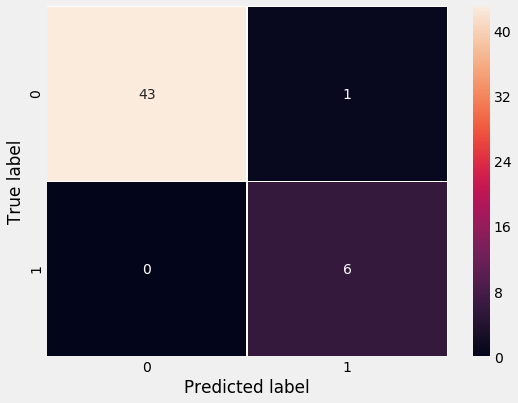

In [85]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

After tuning our Random Forest pitching model, our accuracy score on the test data sits at __98% (10% better than our null baseline)__, picking just one false positive.  Let's see who it was.

In [86]:
X_test['HoF_prob']=rftradpitch.predict_proba(X_test)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
HoF_test=pd.concat([pitch['HoF'],X_test['HoF_prob']],axis=1, join='inner')

In [88]:
HoF_test.sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Juan Marichal,1,1.0
Tom Seaver,1,1.0
Bert Blyleven,1,1.0
Robin Roberts,1,1.0
Nolan Ryan,1,0.8
Jim Kaat,0,0.6
Whitey Ford,1,0.6
Dave Stieb,0,0.4
Ron Guidry,0,0.2


Our lone false positive, given a 60% probability of being voted into the Hall of Fame, is __Jim Kaat__, whose 283 career victories (300 being the old magic number that may possibly never be reached again due to changes in the way pitchers are managed) give him plenty of support in the traditional stats community.

__Option 2:  Logistic Regression__

__Wins__ and __All-Star Games__ were the top 2 most highly correlated with HoF in our pitching heatmap, and in the above feature importance for the Random Forest.  The below set of features (which include those, along with strikeouts and innings pitched) are one of several sets of four features I tried in attempting to build a more accurate Logistic Regression model than the above Random Forest.  This is further explained below these results.

In [89]:
feature_cols=['ASG','W','SO','IP']
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [90]:
lrtradpitch=LogisticRegression(random_state=1)

In [91]:
lrtradpitch.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
y_pred=lrtradpitch.predict(X_test)
accuracy_score(y_test,y_pred)

0.96

In [93]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Our untuned Logistic Regression model performs __8% better__ on the testing data than our null baseline.

In [94]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(lrtradpitch,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9257142857142858
6 0.9327350427350427
7 0.9192022263450835
8 0.9195175438596491
9 0.9317356572258534
10 0.9246153846153847
11 0.9253246753246753
12 0.9324009324009322


We use __cv=6__ for the GridSearch.

In [362]:
lrtradpitch=LogisticRegression(random_state=1)

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

clf=GridSearchCV(lrtradpitch, parameters, cv=6, scoring='accuracy',verbose=1)

In [363]:
clf.fit(X_train,y_train)

Fitting 6 folds for each of 7 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.2s finished


GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [364]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 100}
0.9594594594594594


Our best parameter for __C__ is __100__, and our best cross-validation score is __95.9%__.

In [95]:
lrtradpitch=LogisticRegression(random_state=1, C=100)
lrtradpitch.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
y_pred=lrtradpitch.predict(X_test)
lrtradpitch.score(X_test,y_test)

0.96

In [97]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

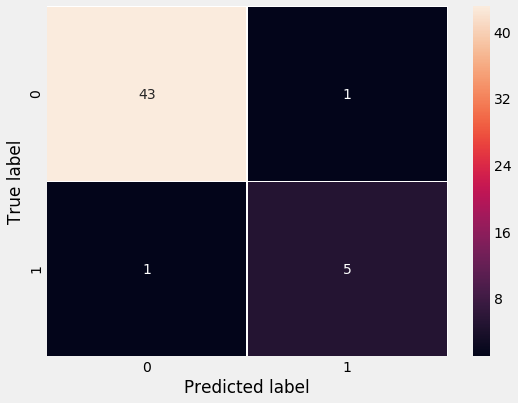

In [98]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

In this case, our accuracy score on the testing data sits at __96%__, which is __8%__ better than our null baseline, but not better than the __98%__ achieved by our Random Forest model, and our best cross-validation score of __95.9%__ does not best the __97.3%__ for our Random Forest model.

__Note:__ Along with this set of features (the top 4 from our earlier correlation matrix), I tried every combination of ASG/W/SHO (since shutouts were a close 5th in our correlation matrix, and strongly 3rd in the above feature importances) with strikeouts, innings pitched, winning percentage, and earned runs, and __none of them performed better in cross-validation than the 97.3% exhibited with our Random Forest model__.

__Therefore, as with our hitting model, we will use the Random Forest pitching model built from traditional statistics to test against a similar model built from the advanced ones.__

# Testing Advanced Stats Models Against Our Traditional Ones

__Process (for both advanced hitting and advanced pitching statistics):__

__1.__ We first throw our advanced features into the Random Forest models we built around our traditional statistics.  It is assumed they won't perform as well on those statistics.

__2.__ We then try to build new Random Forest models around our advanced statistics, and see __whether they do a better job of predicting who gets voted into the Hall of Fame than our traditional models did.__

__________________________________________________________________________________________

__1. Advanced Hitting Features in Traditional Model__

In [99]:
feature_cols=['WAR','JAWS','WAR7','OPS+']
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [100]:
rftradhit=RandomForestClassifier(n_estimators=9, max_depth=6,max_features=4, random_state=1)
rftradhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [101]:
pd.DataFrame({'feature': feature_cols, 'importance':rftradhit.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,WAR,0.497089
1,JAWS,0.347719
3,OPS+,0.090335
2,WAR7,0.064856


In [102]:
y_pred=rftradhit.predict(X_test)
rftradhit.score(X_test,y_test)

0.9274193548387096

In [103]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

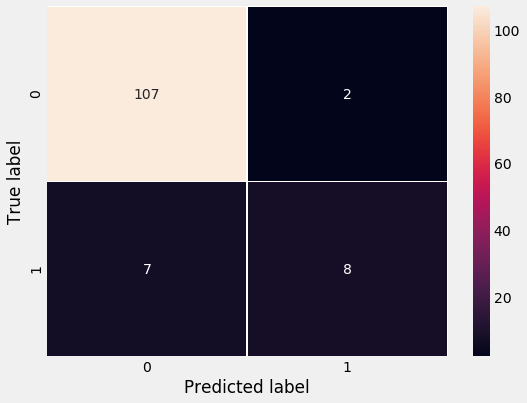

In [104]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

As expected, these features inserted into our traditional Random Forest hitting model don't do a great job of predicting Hall of Famers. However, we'll now try to build a new Random Forest model around these features and see how it does.

__2. Advanced Hitting Model__

In [105]:
feature_cols=['WAR','JAWS','WAR7','OPS+']
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [106]:
ADVhit=RandomForestClassifier(max_features=4, random_state=1)

In [107]:
ADVhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [108]:
y_pred=ADVhit.predict(X_test)
accuracy_score(y_test,y_pred)

0.9435483870967742

In [109]:
y_test.value_counts(normalize=True) 

0    0.879032
1    0.120968
Name: HoF, dtype: float64

The accuracy score for our relatively untuned advanced hitter model is __6.4% better__ than the baseline, as was the case before we tuned our traditional model as well.

In [110]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(ADVhit,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9247518203134641
6 0.9138861608454416
7 0.9113007886592793
8 0.9192780604378662
9 0.9246806039488966
10 0.9086691955113008
11 0.9192847593582887
12 0.9169466845878137


We will use __cv=5__, since that fares the best above.

In [396]:
ADVhit=RandomForestClassifier(random_state=1,max_features=4)

parameters = {
    'max_depth': range(1,13),
    'n_estimators': range(1,101)
}

clf=GridSearchCV(ADVhit, parameters, cv=5, scoring='accuracy',verbose=1)

In [397]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 13), 'n_estimators': range(1, 101)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [398]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 1, 'n_estimators': 10}
0.9354838709677419


In [111]:
ADVhit=RandomForestClassifier(n_estimators=10, max_depth=1,max_features=4, random_state=1)
ADVhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [112]:
pd.DataFrame({'feature': feature_cols, 'importance':ADVhit.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,WAR,0.6
1,JAWS,0.4
2,WAR7,0.0
3,OPS+,0.0


In [113]:
y_pred=ADVhit.predict(X_test)
ADVhit.score(X_test,y_test)

0.9435483870967742

In [114]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

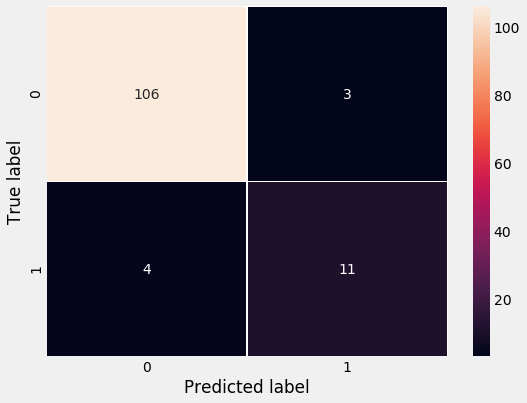

In [115]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

Even with the best parameters (__max_depth=1, n_estimators=10__), our best cross-validation score is only __93.5%__ (compared with __95.7%__ when we tuned our traditional model), and our testing accuracy score of __94.3%__ is worse than the __96%__ in our traditional model.

In [116]:
X_test['HoF_prob']=ADVhit.predict_proba(X_test)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
HoF_test=pd.concat([hit['HoF'],X_test['HoF_prob']],axis=1, join='inner')

In [118]:
HoF_test.sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Mickey Mantle,1,0.801507
Al Kaline,1,0.801507
Brooks Robinson,1,0.801507
Eddie Mathews,1,0.801507
Rod Carew,1,0.801507
Cal Ripken,1,0.801507
Mike Schmidt,1,0.801507
Robin Yount,1,0.801507
Ryne Sandberg,1,0.717138


__Cool note here__:  Chief among the above false positives is __Alan Trammell__, a darling of advanced statistical analysis (which led to the development of stats like WAR and OPS+) who was always thought to be overlooked by the writers, and was finally voted into the Hall of Fame by a Veterans Committee last year, 22 years after his retirement.

In [119]:
HoF_test.loc[HoF_test.HoF==1,:].sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Rod Carew,1,0.801507
Mike Schmidt,1,0.801507
Brooks Robinson,1,0.801507
Eddie Mathews,1,0.801507
Cal Ripken,1,0.801507
Robin Yount,1,0.801507
Mickey Mantle,1,0.801507
Al Kaline,1,0.801507
Gary Carter,1,0.717138


__Note:__ For the sake of completeness, I didn't want to reject the advanced stats model for hitters without running the GridSearch with the same number of k-folds (7) as I had with the traditional hitter model, just in case.

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1) 

In [408]:
ADVhit=RandomForestClassifier(random_state=1,max_features=4)

parameters = {
    'max_depth': range(1,13),
    'n_estimators': range(1,101)
}

clf=GridSearchCV(ADVhit, parameters, cv=7, scoring='accuracy',verbose=1)

In [409]:
clf.fit(X_train,y_train)

Fitting 7 folds for each of 1200 candidates, totalling 8400 fits


[Parallel(n_jobs=1)]: Done 8400 out of 8400 | elapsed: 10.6min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 13), 'n_estimators': range(1, 101)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [410]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 1, 'n_estimators': 3}
0.9381720430107527


Still did worse on the cross-validation!  We can be confident in these results!

In [121]:
ADVhit=RandomForestClassifier(n_estimators=3, max_depth=1,max_features=4, random_state=1)
ADVhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [603]:
pd.DataFrame({'feature': feature_cols, 'importance':ADVhit.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
1,JAWS,0.666667
0,WAR,0.333333
2,WAR7,0.000000
3,OPS+,0.000000


In [122]:
y_pred=ADVhit.predict(X_test)
ADVhit.score(X_test,y_test)

0.9435483870967742

In [608]:
y_test.value_counts(normalize=True)

0    0.879032
1    0.120968
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

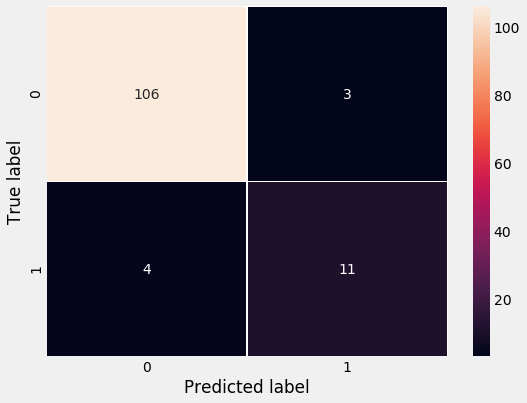

In [123]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

Again, __our Random Forest model built and tuned around our advanced hitting statistics (WAR, JAWS, WAR7, and OPS+) does not fare as well as the one we built around traditional hitting statistics.__

Now, we will execute the same process for advanced pitching statistics.

__1. Advanced Pitching Features in Traditional Model__

In [124]:
feature_cols=['WAR','JAWS','WAR7','ERA+']
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [125]:
rftradpitch=RandomForestClassifier(n_estimators=5, max_depth=5,max_features=4, random_state=1)
rftradpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [126]:
pd.DataFrame({'feature': feature_cols, 'importance':rftradpitch.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,WAR,0.598098
2,WAR7,0.213244
1,JAWS,0.097797
3,ERA+,0.090861


In [127]:
y_pred=rftradpitch.predict(X_test)
rftradpitch.score(X_test,y_test)

0.9

In [128]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

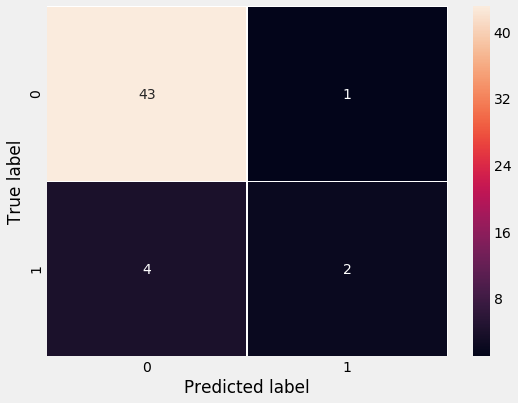

In [129]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

Once again, as expected, these features inserted into our traditional Random Forest pitching model do a pretty poor job of predicting Hall of Famers (4 of our 6 true Hall of Famers end up as false negatives).  Now, we'll try to build a new Random Forest model around these features and see how it does.

__2. Advanced Pitching Model__

In [130]:
feature_cols=['WAR','JAWS','WAR7','ERA+']
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [131]:
ADVpitch=RandomForestClassifier(max_features=4, random_state=1)

In [132]:
ADVpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [133]:
y_pred=ADVpitch.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [134]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

In [135]:
results=[]
for num in range(5,13):
    result= np.mean(cross_val_score(ADVpitch,X_train,y_train, cv=num, scoring='accuracy'))
    print(num,result)
    results.append([num,result])

5 0.9452380952380952
6 0.9588675213675214
7 0.9243970315398887
8 0.9319444444444445
9 0.9452160493827161
10 0.9400000000000001
11 0.9383116883116883
12 0.95750777000777


__Note:__ We used __cv=12__ for the cross-validation of our traditional pitching model, and while __cv=6__ fares a hair better here, it's close enough that I'm happy to run the GridSearch with the same number of folds for the sake of symmetry.

In [431]:
ADVpitch=RandomForestClassifier(random_state=1,max_features=4)

parameters = {
    'max_depth': range(1,13),
    'n_estimators': range(1,101)
}

clf=GridSearchCV(ADVpitch, parameters, cv=12, scoring='accuracy',verbose=1)

In [432]:
clf.fit(X_train,y_train)

Fitting 12 folds for each of 1200 candidates, totalling 14400 fits


[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed: 16.6min finished


GridSearchCV(cv=12, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 13), 'n_estimators': range(1, 101)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [433]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 6, 'n_estimators': 6}
0.9662162162162162


This comes a lot closer to our cross-validation score on our traditional model for pitchers than the corresponding one on the hitters side, __but this best score of 96.6% still doesn't beat 97.3%__.

In [136]:
ADVpitch=RandomForestClassifier(n_estimators=6, max_depth=6,max_features=4, random_state=1)
ADVpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [137]:
pd.DataFrame({'feature': feature_cols, 'importance':ADVpitch.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,WAR,0.637828
2,WAR7,0.192266
1,JAWS,0.087921
3,ERA+,0.081984


In [138]:
y_pred=ADVpitch.predict(X_test)
ADVpitch.score(X_test,y_test)

0.9

In [139]:
y_test.value_counts(normalize=True)

0    0.88
1    0.12
Name: HoF, dtype: float64

Text(0.5,8.74,'Predicted label')

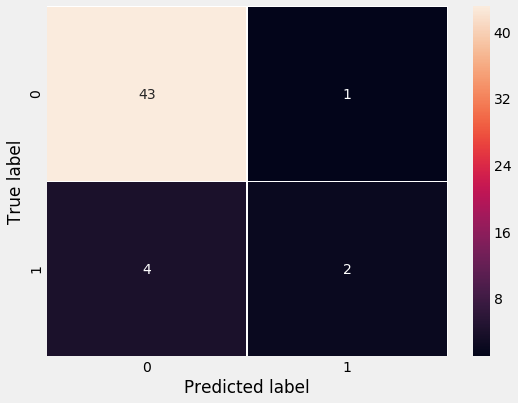

In [140]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.ylabel('True label')
plt.xlabel('Predicted label')

As far as accuracy on our test score, this new model is still only predicting with __90%__ accuracy (far below the __98%__ standard in our traditional model), and more important, __it only gets 2 of our 6 Hall of Famers right__.

In [141]:
X_test['HoF_prob']=ADVpitch.predict_proba(X_test)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
HoF_test=pd.concat([pitch['HoF'],X_test['HoF_prob']],axis=1, join='inner')

In [143]:
HoF_test.sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Tom Seaver,1,1.000000
Kevin Brown,0,1.000000
Bert Blyleven,1,1.000000
Frank Viola,0,0.500000
Wilbur Wood,0,0.333333
Ron Guidry,0,0.333333
Don Newcombe,0,0.333333
Mark Langston,0,0.166667
Robin Roberts,1,0.166667


__Another fun note:__ Again, Kevin Brown, who is given a 100% chance of being voted into the Hall of Fame by the writers in this model, has a huge group of supporters among the analytically-minded baseball community who believe he was robbed.

In [144]:
HoF_test.loc[HoF_test.HoF==1,:].sort_values('HoF_prob', ascending=False)

,HoF,HoF_prob
Name,,
Bert Blyleven,1,1.000000
Tom Seaver,1,1.000000
Juan Marichal,1,0.166667
Robin Roberts,1,0.166667
Nolan Ryan,1,0.000000
Whitey Ford,1,0.000000


# Solution

Through the above process, I have achieved what I set out to:  I have built models from exclusively traditional statistics (one for hitters, one for pitchers) that did a better job of predicting who the writers would vote into the Hall of Fame than corresponding models using exclusively advanced metrics.

__Hitting Model:__ RandomForestClassifier(n_estimators=9, max_depth=6,max_features=4, random_state=1), __Best CV Score:__ 0.956989247311828, __Testing Accuracy:__ 0.9596774193548387

__Pitching Model:__ RandomForestClassifier(n_estimators=5, max_depth=5,max_features=4, random_state=1), __Best CV Score:__ 0.972972972972973, __Testing Accuracy:__ 0.98

# Predicting Future Hall of Famers

__Quick EDA__

In [145]:
hit2019=pd.read_csv('Ind_CSVs/2019BallotHitters.csv')

pitch2019=pd.read_csv('Ind_CSVs/2019BallotPitchers.csv')

hitfuture=pd.read_csv('Ind_CSVs/AllEligibleHitters.csv')

pitchfuture=pd.read_csv('Ind_CSVs/AllEligiblePitchers.csv')

In [146]:
hit2019=hit2019.set_index('Name')

pitch2019=pitch2019.set_index('Name')

hitfuture=hitfuture.set_index('Name')

pitchfuture=pitchfuture.set_index('Name')

In [147]:
hit2019=hit2019.drop(['From','To','G','PA','2B','3B','SB','CS','SO'], axis='columns')

hitfuture=hitfuture.drop(['From','To','G','PA','2B','3B','SB','CS','SO'], axis='columns')

In [148]:
pitch2019=pitch2019.drop(['From','To','G','GS','GF','SV','R','IBB','HBP','BK','WP','BF'], axis='columns')

pitchfuture=pitchfuture.drop(['From','To','G','GS','GF','SV','R','IBB','HBP','BK','WP','BF'], axis='columns')

In [149]:
print(hit2019.shape)
hit2019.head()

(22, 16)


,WAR,WAR7,JAWS,Yrs,ASG,AB,R,H,HR,RBI,BB,BA,OBP,SLG,OPS,OPS+
Name,,,,,,,,,,,,,,,,
Rick Ankiel,5.3,6.5,5.9,11,0,1921,260,462,76,251,162,0.240,0.302,0.422,0.724,92
Edgar Martinez,68.4,43.7,56.0,18,7,7213,1219,2247,309,1261,1283,0.312,0.418,0.515,0.933,147
Barry Bonds,162.8,72.7,117.8,22,14,9847,2227,2935,762,1996,2558,0.298,0.444,0.607,1.051,182
Omar Vizquel,45.6,26.8,36.2,24,3,10586,1445,2877,80,951,1028,0.272,0.336,0.352,0.688,82
Larry Walker,72.7,44.7,58.7,17,5,6907,1355,2160,383,1311,913,0.313,0.400,0.565,0.965,141


In [150]:
print(hitfuture.shape)
hitfuture.head()

(220, 16)


,WAR,WAR7,JAWS,Yrs,ASG,AB,R,H,HR,RBI,BB,BA,OBP,SLG,OPS,OPS+
Name,,,,,,,,,,,,,,,,
Rick Ankiel,5.3,6.5,5.9,11,0,1921,260,462,76,251,162,0.240,0.302,0.422,0.724,92
Edgar Martinez,68.4,43.7,56.0,18,7,7213,1219,2247,309,1261,1283,0.312,0.418,0.515,0.933,147
Barry Bonds,162.8,72.7,117.8,22,14,9847,2227,2935,762,1996,2558,0.298,0.444,0.607,1.051,182
Omar Vizquel,45.6,26.8,36.2,24,3,10586,1445,2877,80,951,1028,0.272,0.336,0.352,0.688,82
Larry Walker,72.7,44.7,58.7,17,5,6907,1355,2160,383,1311,913,0.313,0.400,0.565,0.965,141


In [154]:
pitch2019=pitch2019.dropna() #one of my datasets showed up with a bunch of NaN rows for some reason, so I fixed it

In [155]:
print(pitch2019.shape)
pitch2019.head()

(10, 18)


,WAR,WAR7,JAWS,Yrs,ASG,W,L,W-L%,ERA,ERA+,CG,SHO,IP,H,ER,HR,BB,SO
Name,,,,,,,,,,,,,,,,,,
Roger Clemens,139.6,66.0,102.8,24.0,11.0,354.0,184.0,0.658,3.12,143.0,118.0,46.0,4916.2,4185.0,1707.0,363.0,1580.0,4672.0
Curt Schilling,79.6,48.7,64.1,20.0,6.0,216.0,146.0,0.597,3.46,127.0,83.0,20.0,3261.0,2998.0,1253.0,347.0,711.0,3116.0
Mike Mussina,83.0,44.6,63.8,18.0,5.0,270.0,153.0,0.638,3.68,123.0,57.0,23.0,3562.2,3460.0,1458.0,376.0,785.0,2813.0
Roy Halladay,64.3,50.6,57.5,16.0,8.0,203.0,105.0,0.659,3.38,131.0,67.0,20.0,2749.1,2646.0,1034.0,236.0,592.0,2117.0
Andy Pettitte,60.3,34.1,47.2,18.0,3.0,256.0,153.0,0.626,3.85,117.0,26.0,4.0,3316.0,3448.0,1418.0,288.0,1031.0,2448.0


In [156]:
print(pitchfuture.shape)
pitchfuture.head()

(51, 18)


,WAR,WAR7,JAWS,Yrs,ASG,W,L,W-L%,ERA,ERA+,CG,SHO,IP,H,ER,HR,BB,SO
Name,,,,,,,,,,,,,,,,,,
Roger Clemens,139.6,66.0,102.8,24,11,354,184,0.658,3.12,143,118,46,4916.2,4185,1707,363,1580,4672
Curt Schilling,79.6,48.7,64.1,20,6,216,146,0.597,3.46,127,83,20,3261.0,2998,1253,347,711,3116
Mike Mussina,83.0,44.6,63.8,18,5,270,153,0.638,3.68,123,57,23,3562.2,3460,1458,376,785,2813
Roy Halladay,64.3,50.6,57.5,16,8,203,105,0.659,3.38,131,67,20,2749.1,2646,1034,236,592,2117
Andy Pettitte,60.3,34.1,47.2,18,3,256,153,0.626,3.85,117,26,4,3316.0,3448,1418,288,1031,2448


__Which hitters will be voted in?__

In [157]:
feature_cols=hit.columns.drop(['HoF','WAR','JAWS','WAR7','OPS+'])
X=hit[feature_cols]
y=hit['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [158]:
rftradhit=RandomForestClassifier(n_estimators=9, max_depth=6,max_features=4, random_state=1)
rftradhit.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [159]:
X=hit2019[feature_cols]

In [160]:
X['HoF_prob']=rftradhit.predict_proba(X)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
HoF_pred=pd.concat([hit2019['WAR'],X['HoF_prob']],axis=1, join='inner')

In [162]:
HoF_pred.sort_values('HoF_prob', ascending=False).head(12)

,WAR,HoF_prob
Name,,
Gary Sheffield,60.5,1.000000
Todd Helton,61.2,1.000000
Barry Bonds,162.8,1.000000
Manny Ramirez,69.4,1.000000
Sammy Sosa,58.6,0.888889
Larry Walker,72.7,0.666667
Fred McGriff,52.6,0.555556
Lance Berkman,52.1,0.444444
Omar Vizquel,45.6,0.333333


These are the 12 hitters currently on the ballot who are given a better than 10% chance of being voted into the Hall of Fame (eventually, not necessarily this year) based on our model.  This is a tough list to evaluate, of course, because 4 of the top 5 here (all except Helton) have been implicated in steroid-related scandals.  How that affects their ultimate Hall of Fame induction remains to be seen.  Also of note is that exit polls indicate that Edgar Martinez (listed above at 11% likelihood) _will_ be voted in this year, in this his 10th and final year of eligibility.

In [163]:
X=hitfuture[feature_cols]

In [164]:
X['HoF_prob']=rftradhit.predict_proba(X)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
HoF_pred=pd.concat([hitfuture['WAR'],X['HoF_prob']],axis=1, join='inner')

In [166]:
HoF_pred.sort_values('HoF_prob', ascending=False).head(16)

,WAR,HoF_prob
Name,,
Barry Bonds,162.8,1.000000
Manny Ramirez,69.4,1.000000
Gary Sheffield,60.5,1.000000
Alex Rodriguez,117.8,1.000000
Todd Helton,61.2,1.000000
David Ortiz,55.3,1.000000
Miguel Cabrera,69.4,1.000000
Albert Pujols,100.0,1.000000
Derek Jeter,72.4,0.888889


These are the hitters who at some point will be eligible for Hall of Fame induction (or already are) who are given a better than 50% chance of getting in.  Again, plenty of players on this list have steroid links (which couldn't be factored into the analysis), but the rest of them stand a very good chance of being voted in by the writers eventually (with the exception of Fred McGriff, who seems destined to fall off the ballot this year, though a Veterans Committee should let him in eventually).

In [167]:
HoF_pred.sort_values('WAR', ascending=False).head(20)

,WAR,HoF_prob
Name,,
Barry Bonds,162.8,1.000000
Alex Rodriguez,117.8,1.000000
Albert Pujols,100.0,1.000000
Adrian Beltre,95.7,0.666667
Larry Walker,72.7,0.666667
Derek Jeter,72.4,0.888889
Scott Rolen,70.2,0.111888
Carlos Beltran,69.8,0.888889
Manny Ramirez,69.4,1.000000


__Which pitchers will be voted in?__

In [168]:
feature_cols=pitch.columns.drop(['HoF','WAR','JAWS','WAR7','ERA+'])
X=pitch[feature_cols]
y=pitch['HoF']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [169]:
rftradpitch=RandomForestClassifier(n_estimators=5, max_depth=5,max_features=4, random_state=1)
rftradpitch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [170]:
X=pitch2019[feature_cols]

In [171]:
X['HoF_prob']=rftradpitch.predict_proba(X)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
HoF_pred=pd.concat([pitch2019['WAR'],X['HoF_prob']],axis=1, join='inner')

In [173]:
HoF_pred.sort_values('HoF_prob', ascending=False).head()

,WAR,HoF_prob
Name,,
Roger Clemens,139.6,0.8
Roy Halladay,64.3,0.8
Curt Schilling,79.6,0.2
Mike Mussina,83.0,0.2
Andy Pettitte,60.3,0.2


The above 5 pitchers are the only ones currently on the ballot who are given any shot of getting voted in by our model.  Of them, Clemens would be a slam-dunk if not for his steroid ties, Halladay looks like he'll be voted in this year (according to exit polls), and Schilling and Mussina probably will be in the next 2 or 3.

In [174]:
X=pitchfuture[feature_cols]

In [175]:
X['HoF_prob']=rftradpitch.predict_proba(X)[:,1]

/Users/leemac113/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
HoF_pred=pd.concat([pitchfuture['WAR'],X['HoF_prob']],axis=1, join='inner')

In [177]:
HoF_pred.sort_values('HoF_prob', ascending=False).head(4)

,WAR,HoF_prob
Name,,
Roger Clemens,139.6,0.8
Roy Halladay,64.3,0.8
Justin Verlander,63.4,0.6
Clayton Kershaw,64.6,0.6


This would indicate that, according to our model, if Justin Verlander and Clayton Kershaw were to retire today, they would have a 60% chance of getting voted into the Hall of Fame.  Both are still close to the top of their games (and will not in fact retire today), and my best guess is that they will one day be enshrined.

In [178]:
HoF_pred.sort_values('WAR', ascending=False).head(10)

,WAR,HoF_prob
Name,,
Roger Clemens,139.6,0.8
Mike Mussina,83.0,0.2
Curt Schilling,79.6,0.2
Zack Greinke,65.7,0.0
Clayton Kershaw,64.6,0.6
Roy Halladay,64.3,0.8
Justin Verlander,63.4,0.6
CC Sabathia,62.7,0.2
Andy Pettitte,60.3,0.2


# Limitations/Future Analysis

__Limitations__

1. The nature of this project treats the BBWAA as if it was one voting body, when in fact the voters (and of course the players and the game itself) are changing, as are their views on statistics and their analysis.  In a world where the BBWAA was a set group of immortal baseball writers, this analysis would obviously be more precise.

2. There are many external factors which enter into Hall of Fame voting outside of statistics that couldn't be accounted for in an analysis such as this.  Performance-enhancing drugs are a more recent example we can point to, but there are other factors, such as the places someone played (one is more likely to gain notoriety in New York than in Seattle) or their previous interactions with the media (who could be biased to vote against them if said interactions were negative).

3. The cutline of 1966 for my analysis, while not an arbitrary one, was not the only option I could have chosen, as many changes to Hall of Fame voting have occurred before and after (full list here: https://baseballhall.org/hall-of-famers/rules/voting-rules-history).

4. This is mentioned above, but the caveat is worth mentioning again:  even though my Random Forests built on traditional statistics were built with max_features=4, they were still allowed to choose any four from the bunch, while the ones built on advanced statistics were only allowed to choose from the specific 4 (WAR, WAR7, JAWS, ERA+/OPS+).  Thus, one can't draw a conclusion such as "traditional statistics are a better measure of Hall of Fame induction than advanced statistics".

Despite these limitations, however, I am satisified with my results-- __I succeeded in building Random Forest models exclusively on traditional statistics that serve as strong predictors of Hall of Fame election by the BBWAA.__

__Potential Next Steps__

1. A similar analysis could be done __by position__ (not just by hitters and pitchers), as the Hall of Fame standards for certain positions are different than those for others.

2. While my goal here wasn't to build the __best possible predictive model of Hall of Fame induction in general__ (as I've repeated ad nauseam), that would certainly be a worthwhile endeavor to embark on.